**<h2>1. 변수선택</h2>**

In [52]:
import pandas as pd
df = pd.read_csv('/content/sample_data/potato_final.csv', index_col=0)
df.dropna(axis=0, inplace=True)

In [53]:
df.tail(10)

,Date,Rain,Wind,Sup,Temp,Oil,sobimul,nongmul,Price,Avg_Price,Produced
3545,2022-09-19,0.0,3.3,63.1,24.6,1889.31,2.5,8.7,403.0,507.0,549878
3546,2022-09-20,0.0,2.3,57.0,19.9,1889.31,2.5,8.7,412.0,504.0,549878
3547,2022-09-21,0.0,1.8,56.9,19.4,1889.31,2.5,8.7,423.0,495.0,549878
3548,2022-09-22,0.0,2.0,60.1,19.8,1889.31,2.5,8.7,415.0,489.0,549878
3549,2022-09-23,3.3,3.1,68.9,17.5,1889.31,2.5,8.7,415.0,483.0,549878
3552,2022-09-26,0.0,1.7,58.5,20.0,1889.31,2.5,8.7,415.0,486.0,549878
3553,2022-09-27,0.0,1.6,59.0,20.9,1889.31,2.5,8.7,415.0,491.0,549878
3554,2022-09-28,0.0,1.8,71.0,20.4,1889.31,2.5,8.7,415.0,496.0,549878
3555,2022-09-29,0.0,1.4,73.5,20.4,1889.31,2.5,8.7,415.0,498.0,549878
3556,2022-09-30,0.0,1.6,68.0,20.7,1889.31,2.5,8.7,415.0,484.0,549878


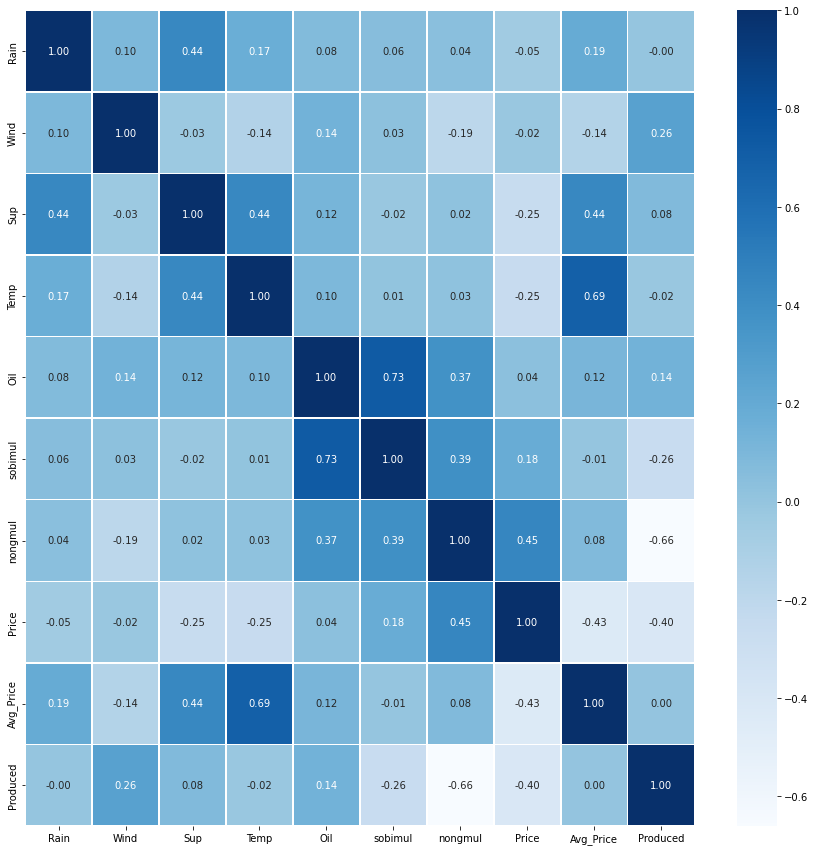

In [54]:
import matplotlib.pyplot as plt 
import seaborn as sns   

plt.figure(figsize=(15,15))
sns.heatmap(data = df.iloc[:,1:].corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df.iloc[:,1:].values, i) for i in range(df.iloc[:,1:].shape[1])]
vif["features"] = df.iloc[:,1:].columns 
vif

,VIF Factor,features
0,1.336223,Rain
1,11.425954,Wind
2,26.190688,Sup
3,5.311373,Temp
4,219.926612,Oil
5,17.810306,sobimul
6,6.441703,nongmul
7,12.961493,Price
8,31.699477,Avg_Price
9,175.326379,Produced


In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = df.iloc[:, 1:]
scaler.fit(x.values)
x.loc[:,:] = scaler.transform(x.values)

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns 
vif

,VIF Factor,features
0,1.312380,Rain
1,5.450449,Wind
2,11.243204,Sup
3,14.792895,Temp
4,13.400769,Oil
5,8.095756,sobimul
6,9.725722,nongmul
7,5.187378,Price
8,7.827645,Avg_Price
9,7.898909,Produced


In [58]:
x = x.drop(['Temp'],axis=1)

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns 
vif

,VIF Factor,features
0,1.295448,Rain
1,5.431854,Wind
2,9.838673,Sup
3,13.313601,Oil
4,7.967176,sobimul
5,9.724457,nongmul
6,4.873991,Price
7,4.668232,Avg_Price
8,7.710662,Produced


In [60]:
x = x.drop(['Oil'],axis=1)

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns 
vif

,VIF Factor,features
0,1.282986,Rain
1,5.404786,Wind
2,9.562428,Sup
3,3.375828,sobimul
4,7.151709,nongmul
5,4.369409,Price
6,4.632286,Avg_Price
7,4.889893,Produced


In [65]:
x = x.drop(['Sup'],axis=1)

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns 
vif

,VIF Factor,features
0,1.127647,Rain
1,5.315121,Wind
2,3.372331,sobimul
3,6.683433,nongmul
4,4.317568,Price
5,3.599467,Avg_Price
6,4.034682,Produced


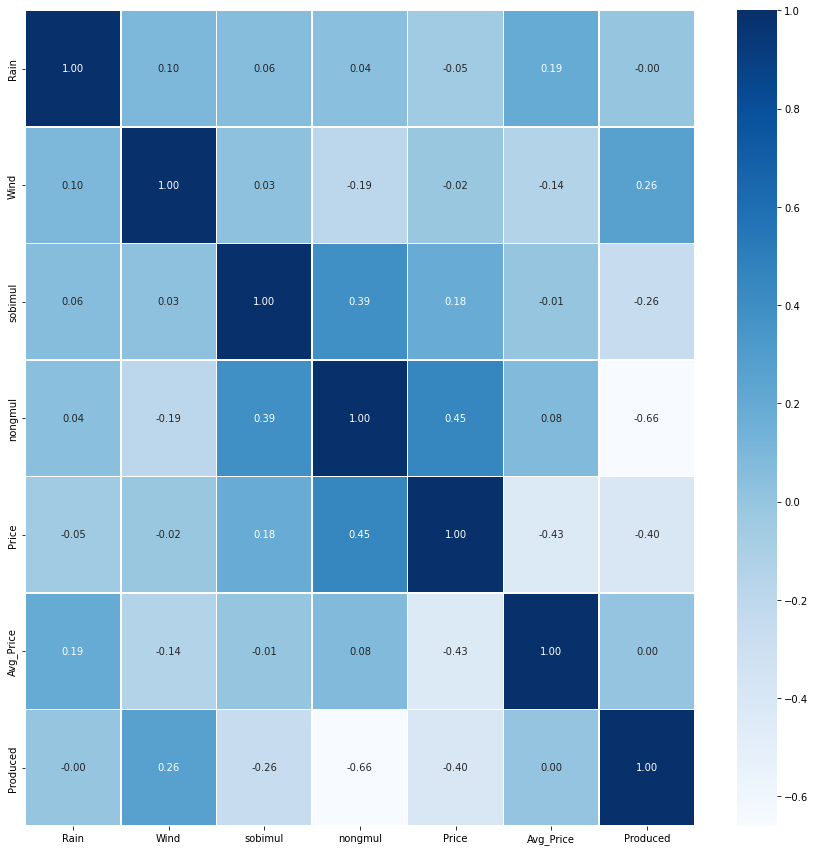

In [70]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df.loc[:,['Rain', 'Wind', 'sobimul', 'nongmul', 'Price', 'Avg_Price','Produced']].corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

변수 선택 근거: 이전의 농산물 관련 논문들을 참고하여 농산물 가격에 영향을 미치는 여러가지 변수를 일단 선택하였다. 그 후 회귀 분석에서 어떤 독립 변수가 다른 독립 변수와 상관 정도가 높다면, 각각의 설명력이 약해지는 다중공선성의 문제가 발생하기 때문에, 그러한 문제를 해결하기 위해 변수를 선택하였다.

1. 피어슨 상관계수: 변수들간의 상관관계를 나타내는 피어슨 상관계수는 통상적으로 0.8이상이면 다중공선성이 있다고 판단된다.

2. VIF( 분산팽창계수 ): VIF가 10이 넘으면 다중공선성 있다고 판단하며 5가 넘으면 주의할 필요가 있는 것으로 본다. 독립 변수 a와 b가 서로 상관 관계가 있다고 했을 때 두 변수 모두 VIF가 높다. 

3. 요일: 사람의 행동은 요일에 따라 변하는 경우가 많으므로 요일을 원 핫 인코딩을 통해 표현한다.  

4. 변수삭제법: 변수삭제법은 시계열 데이터라는 특성 상 Target과 이전 날짜들의 관계가 너무 많아지기 때문에 생략하였다. LSTM 등 RNN 계열의 딥러닝 알고리즘을 사용한 논문들을 참고하였을 때, 거의 모든 논문이 위에서 언급한 방법들로 변수를 선택하였기 때문에 타당하다고 판단하였다.

=> 이러한 근거들을 바탕으로 평균 강수량( Rain ), 평균 풍속( Wind ), 소비자물가( sobimul ), 농산물물가( nongmul ), Price( 현재 가격 ), Avg_Price( 평년 가격 ), 생산량( Produced ), 요일 원 핫 인코딩( 5일이므로 4개 ) 총 11개의 변수를 선택하였다.